In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Function to apply Iterative Imputer to the dataframe |Handling missing values
def apply_iterative_imputer(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    non_numerical_columns = df.select_dtypes(exclude=[np.number]).columns

    numerical_data = df[numerical_columns]
    non_numerical_data = df[non_numerical_columns]

    imputer = IterativeImputer(max_iter=10, random_state=42)
    imputed_data = imputer.fit_transform(numerical_data)

    imputed_numerical_data = pd.DataFrame(imputed_data, columns=numerical_columns)
    imputed_df = pd.concat([imputed_numerical_data, non_numerical_data], axis=1)

    return imputed_df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the scores data
scores = pd.read_csv("/content/drive/MyDrive/Lumiere/Data/scores - scores (1).csv")

In [ ]:
data = []
for _, row in scores.iterrows():
  for i in range(1,23):
    patient_data = pd.read_csv("/content/drive/MyDrive/Lumiere/Data/condition/condition_{}.csv".format(i))
    patient_data = apply_iterative_imputer(patient_data)
    patient_activity = patient_data['activity']
    features = [patient_activity.mean(), patient_activity.std(), patient_activity.min(), patient_activity.max()]
    features.extend(row[['gender', 'age','marriage', 'work']].values)
    label = 1 if row['afftype'] == 1 else 0
    data.append(features + [label])

data = pd.DataFrame(data, columns=['mean_activity', 'std_activity', 'min_activity', 'max_activity', 'days', 'age', 'marriage', 'work', 'label'])

In [ ]:
data = apply_iterative_imputer(data)
data

,mean_activity,std_activity,min_activity,max_activity,days,marriage,work,label,age
0,146.948030,294.592424,0.0,3526.0,2.0,1.0,2.0,0.0,35-39
1,153.664748,330.801716,0.0,4228.0,2.0,1.0,2.0,0.0,35-39
2,265.299704,399.881083,3.0,3847.0,2.0,1.0,2.0,0.0,35-39
3,274.866998,446.048930,0.0,6776.0,2.0,1.0,2.0,0.0,35-39
4,167.245987,298.719629,0.0,4609.0,2.0,1.0,2.0,0.0,35-39
...,...,...,...,...,...,...,...,...,...
479,71.104090,136.137517,0.0,1355.0,1.0,2.0,2.0,0.0,30-34
480,157.240215,286.974106,0.0,8000.0,1.0,2.0,2.0,0.0,30-34
481,54.697992,148.185917,0.0,2150.0,1.0,2.0,2.0,0.0,30-34
482,79.480061,214.975597,0.0,3869.0,1.0,2.0,2.0,0.0,30-34


In [ ]:
# # Handle missing values
# imputer = IterativeImputer()
# data_imputed = imputer.fit_transform(data.drop(columns=['label']))
# data = pd.DataFrame(data_imputed, columns=data.columns[:-1])


In [ ]:
data.tail()

,mean_activity,std_activity,min_activity,max_activity,days,marriage,work,label,age
479,71.104090,136.137517,0.0,1355.0,1.0,2.0,2.0,0.0,30-34
480,157.240215,286.974106,0.0,8000.0,1.0,2.0,2.0,0.0,30-34
481,54.697992,148.185917,0.0,2150.0,1.0,2.0,2.0,0.0,30-34
482,79.480061,214.975597,0.0,3869.0,1.0,2.0,2.0,0.0,30-34
483,161.756063,253.512272,0.0,3222.0,1.0,2.0,2.0,0.0,30-34


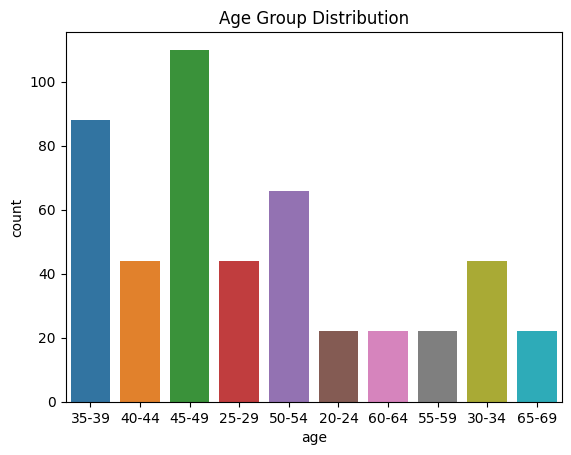

In [ ]:
# Visualize distribution of age groups
sns.countplot(x="age", data=data)
plt.title("Age Group Distribution")
plt.show()


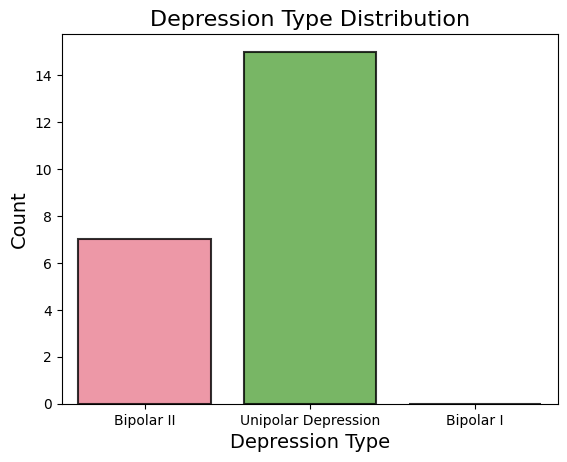

In [ ]:
# Define the new labels
new_labels = [ "Bipolar II","Unipolar Depression","Bipolar I"]
#1: bipolar II, 2: unipolar depressive, 3: bipolar I

# Visualize distribution of depression types
ax = sns.countplot(x="afftype", data=scores, order=[1, 2, 3], palette="husl",
              edgecolor="black", linewidth=1.5, saturation=0.8,
              alpha=0.8, label="Count")

# Set x-axis tick labels
ax.set_xticklabels(new_labels)

# Add axis labels and title
plt.xlabel("Depression Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Depression Type Distribution", fontsize=16)

# Show the plot
plt.show()


In [ ]:
l=[]
for i in data['age']:
  a= i[0]+i[1]
  l.append(int(a))
print(l)

[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 40, 40, 40, 40, 40, 40, 40, 40,

In [ ]:
n=data.columns[8]
print(n)

age


In [ ]:

data.drop(n, axis = 1, inplace = True)


In [ ]:
data['age']=l

In [ ]:
data


,mean_activity,std_activity,min_activity,max_activity,days,marriage,work,label,age
0,146.948030,294.592424,0.0,3526.0,2.0,1.0,2.0,0.0,35
1,153.664748,330.801716,0.0,4228.0,2.0,1.0,2.0,0.0,35
2,265.299704,399.881083,3.0,3847.0,2.0,1.0,2.0,0.0,35
3,274.866998,446.048930,0.0,6776.0,2.0,1.0,2.0,0.0,35
4,167.245987,298.719629,0.0,4609.0,2.0,1.0,2.0,0.0,35
...,...,...,...,...,...,...,...,...,...
479,71.104090,136.137517,0.0,1355.0,1.0,2.0,2.0,0.0,30
480,157.240215,286.974106,0.0,8000.0,1.0,2.0,2.0,0.0,30
481,54.697992,148.185917,0.0,2150.0,1.0,2.0,2.0,0.0,30
482,79.480061,214.975597,0.0,3869.0,1.0,2.0,2.0,0.0,30


In [ ]:
# Split data into training and test sets
X = data.drop(columns=['label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


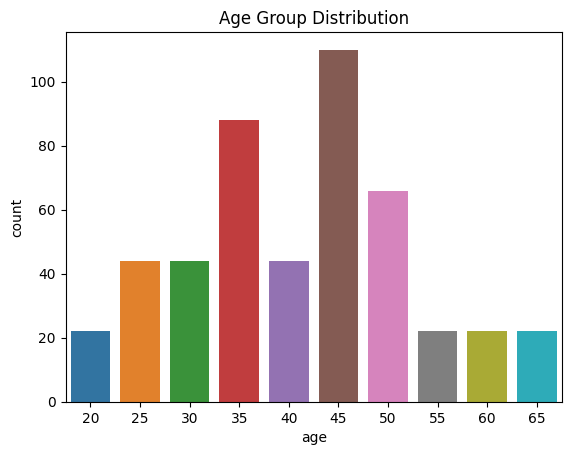

In [ ]:
# Visualize distribution of age groups
sns.countplot(x="age", data=data)
plt.title("Age Group Distribution")
plt.show()


In [ ]:
data['age']

0      35
1      35
2      35
3      35
4      35
       ..
479    30
480    30
481    30
482    30
483    30
Name: age, Length: 484, dtype: int64

In [ ]:


# Handle imbalanced data
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Logistic Regression Accuracy: 61.64%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69       100
         1.0       0.42      0.61      0.50        46

    accuracy                           0.62       146
   macro avg       0.60      0.61      0.59       146
weighted avg       0.66      0.62      0.63       146

Confusion Matrix:
[[62 38]
 [18 28]]


Random Forest Accuracy: 79.45%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       100
         1.0       0.71      0.59      0.64        46

    accuracy                           0.79       146
   macro avg       0.77      0.74      0.75       146
weighted avg       0.79      0.79      0.79       146

Confusion Matrix:
[[89 11]
 [19 27]]


SVM Accuracy: 71.23%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       100
 

In [ ]:
# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean() * 100:.2f}% (+/- {scores.std() * 100:.2f})")

# Feature importance (for Random Forest)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature importances (Random Forest):")
print(feature_importances)

Logistic Regression Cross-Validation Accuracy: 66.09% (+/- 4.58)
Random Forest Cross-Validation Accuracy: 89.35% (+/- 3.85)
SVM Cross-Validation Accuracy: 77.39% (+/- 5.21)
Decision Tree Cross-Validation Accuracy: 88.70% (+/- 3.74)
K-Nearest Neighbors Cross-Validation Accuracy: 84.35% (+/- 1.11)
Gradient Boosting Cross-Validation Accuracy: 90.65% (+/- 3.93)
Feature importances (Random Forest):
age              0.432777
marriage         0.207413
days             0.130806
work             0.074981
mean_activity    0.054291
std_activity     0.049334
max_activity     0.044657
min_activity     0.005741
dtype: float64


In [ ]:
# Hyperparameter tuning (for Random Forest)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters for Random Forest:")
print(grid_search.best_params_)
print("Best score for Random Forest:")
print(grid_search.best_score_)


Best parameters for Random Forest:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}
Best score for Random Forest:
0.9260869565217391


In [ ]:
# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest (Tuned) Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")

Random Forest (Tuned) Accuracy: 78.08%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       100
         1.0       0.69      0.54      0.61        46

    accuracy                           0.78       146
   macro avg       0.75      0.72      0.73       146
weighted avg       0.77      0.78      0.77       146

Confusion Matrix:
[[89 11]
 [21 25]]




Random Forest (Tuned) Accuracy: 78.08%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       100
         1.0       0.69      0.54      0.61        46

    accuracy                           0.78       146
   macro avg       0.75      0.72      0.73       146
weighted avg       0.77      0.78      0.77       146



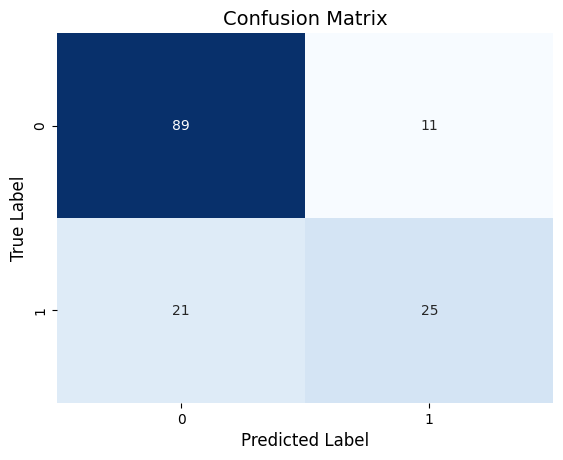

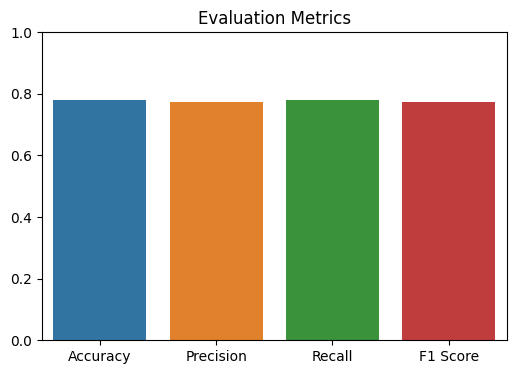

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get the best model and make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate accuracy and print results
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest (Tuned) Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Plot evaluation metrics
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
            y=[accuracy, precision, recall, f1_score], ax=ax)
ax.set_ylim([0, 1])
ax.set_title('Evaluation Metrics')
plt.show()


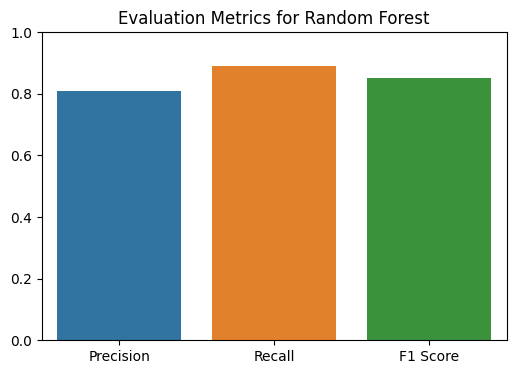

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
precision = 0.81
recall = 0.89
f1_score = 0.85

# Create the bar chart
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=['Precision', 'Recall', 'F1 Score'],
            y=[precision, recall, f1_score], ax=ax)
ax.set_ylim([0, 1])
ax.set_title('Evaluation Metrics for Random Forest')
plt.show()


Random Forest (Tuned) Accuracy: 78.08%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       100
         1.0       0.69      0.54      0.61        46

    accuracy                           0.78       146
   macro avg       0.75      0.72      0.73       146
weighted avg       0.77      0.78      0.77       146



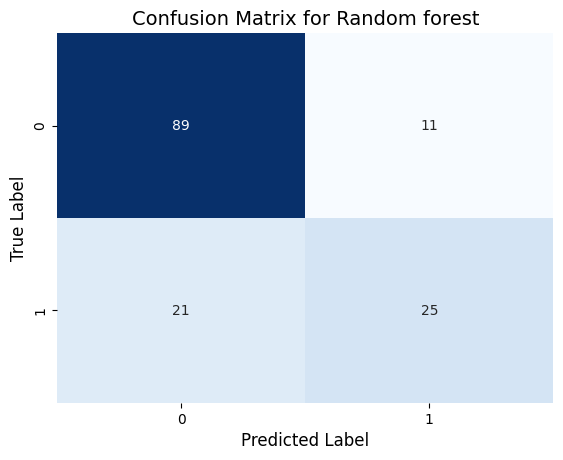

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the best model and make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate accuracy and print results
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest (Tuned) Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.set_title('Confusion Matrix for Random forest', fontsize=14)
plt.show()


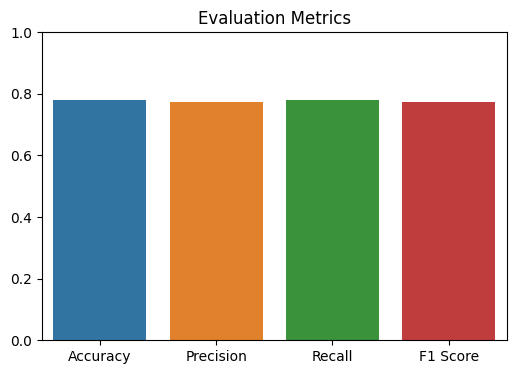

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get the best model and make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract evaluation metrics
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Plot evaluation metrics
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
            y=[accuracy, precision, recall, f1_score], ax=ax)
ax.set_ylim([0, 1])
ax.set_title('Evaluation Metrics')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was 

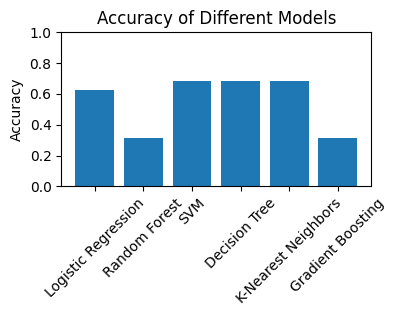

In [ ]:
import matplotlib.pyplot as plt

# Calculate accuracy for each model
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Create a bar chart to visualize the accuracy of different models
fig, ax = plt.subplots(figsize=(4, 2))
ax.bar(accuracy_results.keys(), accuracy_results.values())
ax.set_ylim([0, 1])
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()
